# Esfandiar Kiani (40311614) - ML Homework 02.4

## Imports

In [407]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import math

## Load Data

In [67]:
# fetch dataset 
df = fetch_ucirepo(id=9) 

# data (as pandas dataframes) 
x = df.data.features 
y = df.data.targets 

### Some codes

In [68]:
# metadata 
print(df.metadata) 

print('-----------------------------------------------------------------------------------------------------------------------------------') 
  
# variable information 
print(df.variables) 

{'uci_id': 9, 'name': 'Auto MPG', 'repository_url': 'https://archive.ics.uci.edu/dataset/9/auto+mpg', 'data_url': 'https://archive.ics.uci.edu/static/public/9/data.csv', 'abstract': 'Revised from CMU StatLib library, data concerns city-cycle fuel consumption', 'area': 'Other', 'tasks': ['Regression'], 'characteristics': ['Multivariate'], 'num_instances': 398, 'num_features': 7, 'feature_types': ['Real', 'Categorical', 'Integer'], 'demographics': [], 'target_col': ['mpg'], 'index_col': ['car_name'], 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1993, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5859H', 'creators': ['R. Quinlan'], 'intro_paper': None, 'additional_info': {'summary': 'This dataset is a slightly modified version of the dataset provided in the StatLib library.  In line with the use by Ross Quinlan (1993) in predicting the attribute "mpg", 8 of the original instances were removed because they had unknown values for th

In [10]:
print(x)
print('------------------------------------------------------------------------------------------------------------------------------------')
print(y)

     displacement  cylinders  horsepower  weight  acceleration  model_year  \
0           307.0          8       130.0    3504          12.0          70   
1           350.0          8       165.0    3693          11.5          70   
2           318.0          8       150.0    3436          11.0          70   
3           304.0          8       150.0    3433          12.0          70   
4           302.0          8       140.0    3449          10.5          70   
..            ...        ...         ...     ...           ...         ...   
393         140.0          4        86.0    2790          15.6          82   
394          97.0          4        52.0    2130          24.6          82   
395         135.0          4        84.0    2295          11.6          82   
396         120.0          4        79.0    2625          18.6          82   
397         119.0          4        82.0    2720          19.4          82   

     origin  
0         1  
1         1  
2         1  
3      

In [12]:
x.info()
print('------------------------------------------------------------------------------------------------------------------------------------')
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   displacement  398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   horsepower    392 non-null    float64
 3   weight        398 non-null    int64  
 4   acceleration  398 non-null    float64
 5   model_year    398 non-null    int64  
 6   origin        398 non-null    int64  
dtypes: float64(3), int64(4)
memory usage: 21.9 KB
------------------------------------------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     398 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


## Normalize data

In [104]:
columns = list(df.variables['name'])

columns.remove('mpg')
columns.remove('car_name')

print(columns)

['displacement', 'cylinders', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin']


In [101]:
scaler = StandardScaler()
x_scaled = pd.DataFrame(scaler.fit_transform(x))
y_scaled = pd.DataFrame(scaler.fit_transform(y))

In [103]:
print(x_scaled)
print(x)
print('------------------------------------------------------------------------------------------------------------------------------------')
print(y_scaled)
print(y)

            0         1         2         3         4         5         6
0    1.090604  1.498191  0.664133  0.630870 -1.295498 -1.627426 -0.715145
1    1.503514  1.498191  1.574594  0.854333 -1.477038 -1.627426 -0.715145
2    1.196232  1.498191  1.184397  0.550470 -1.658577 -1.627426 -0.715145
3    1.061796  1.498191  1.184397  0.546923 -1.295498 -1.627426 -0.715145
4    1.042591  1.498191  0.924265  0.565841 -1.840117 -1.627426 -0.715145
..        ...       ...       ...       ...       ...       ...       ...
393 -0.513026 -0.856321 -0.480448 -0.213324  0.011586  1.621983 -0.715145
394 -0.925936 -0.856321 -1.364896 -0.993671  3.279296  1.621983  0.533222
395 -0.561039 -0.856321 -0.532474 -0.798585 -1.440730  1.621983 -0.715145
396 -0.705077 -0.856321 -0.662540 -0.408411  1.100822  1.621983 -0.715145
397 -0.714680 -0.856321 -0.584501 -0.296088  1.391285  1.621983 -0.715145

[398 rows x 7 columns]
     displacement  cylinders  horsepower  weight  acceleration  model_year  \
0         

## Train/Test split

In [237]:
x_train, x_test = x_scaled[:100], x_scaled[100:]
y_train, y_test = y_scaled[:100], y_scaled[100:]

## Root Mean Squered Error function

In [408]:
def RMS(y_true, y_pred):
    return math.sqrt(sum((y_true - y_pred) ** 2) / len(y_true))

## Polynomial function

In [162]:
print(x_train.shape)
for feature in range(7):
    print(x_train[:][feature])

(100, 7)
0     1.090604
1     1.503514
2     1.196232
3     1.061796
4     1.042591
        ...   
95    2.511784
96    1.599540
97    0.303193
98    0.543257
99    0.370411
Name: 0, Length: 100, dtype: float64
0     1.498191
1     1.498191
2     1.498191
3     1.498191
4     1.498191
        ...   
95    1.498191
96    1.498191
97    0.320935
98    0.320935
99    0.320935
Name: 1, Length: 100, dtype: float64
0     0.664133
1     1.574594
2     1.184397
3     1.184397
4     0.924265
        ...   
95    3.135386
96    1.834726
97    0.013803
98   -0.116263
99   -0.116263
Name: 2, Length: 100, dtype: float64
0     0.630870
1     0.854333
2     0.550470
3     0.546923
4     0.565841
        ...   
95    2.341722
96    1.005673
97    0.178032
98    0.363660
99   -0.030061
Name: 3, Length: 100, dtype: float64
0    -1.295498
1    -1.477038
2    -1.658577
3    -1.295498
4    -1.840117
        ...   
95   -1.658577
96   -1.658577
97    0.338357
98    0.882975
99    0.156817
Name: 4, Length: 1

In [179]:
def polynomial_basis(X, deg):
    samples_count, features_count = X.shape
    # print(f"samples_count: {samples_count}, features_count: {features_count}")
    X_poly = np.ones((samples_count, (deg * features_count) + 1))  
    col = 1
    for d in range(1, deg + 1):
        for feature in range(features_count):
            X_poly[:, col] = X[:][feature] ** d
            col += 1

    return X_poly

## Store errors for plot

In [227]:
train_errors_1_to_10, test_errors_1_to_10 = [], []
train_errors_1_to_7, test_errors_1_to_7 = [], []

## Regression

In [225]:
for deg in range(1, 10+1):
    X_train_poly = polynomial_basis(x_train, deg)
    X_test_poly = polynomial_basis(x_test, deg)

    # print("NaN in X_train_poly:", np.isnan(X_train_poly).any())
    # print("NaN in X_test_poly:", np.isnan(X_test_poly).any())

    X_train_poly = np.nan_to_num(X_train_poly)
    X_test_poly = np.nan_to_num(X_test_poly)

    # print("NaN in New X_train_poly:", np.isnan(X_train_poly).any())
    # print("NaN in New X_test_poly:", np.isnan(X_test_poly).any())
    
    theta = np.linalg.inv(X_train_poly.T @ X_train_poly) @ X_train_poly.T @ y_train
    
    y_train_pred = X_train_poly @ theta
    y_test_pred = X_test_poly @ theta
    
    train_errors_1_to_10.append(RMS(y_train, y_train_pred))
    test_errors_1_to_10.append(RMS(y_test, y_test_pred))

In [228]:
for deg in range(1, 7+1):
    X_train_poly = polynomial_basis(x_train, deg)
    X_test_poly = polynomial_basis(x_test, deg)

    # print("NaN in X_train_poly:", np.isnan(X_train_poly).any())
    # print("NaN in X_test_poly:", np.isnan(X_test_poly).any())

    X_train_poly = np.nan_to_num(X_train_poly)
    X_test_poly = np.nan_to_num(X_test_poly)

    # print("NaN in New X_train_poly:", np.isnan(X_train_poly).any())
    # print("NaN in New X_test_poly:", np.isnan(X_test_poly).any())
    
    theta = np.linalg.inv(X_train_poly.T @ X_train_poly) @ X_train_poly.T @ y_train
    
    y_train_pred = X_train_poly @ theta
    y_test_pred = X_test_poly @ theta
    
    train_errors_1_to_7.append(RMS(y_train, y_train_pred))
    test_errors_1_to_7.append(RMS(y_test, y_test_pred))

In [196]:
print(theta.head())

              0
0  11832.376058
1     -1.188443
2  -8599.064828
3     -0.552717
4     -0.433928


## Plot the error

In [204]:
print(train_errors_1_to_10)
print(test_errors_1_to_10)

[0.2464968577462189, 0.17505881715618843, 0.1818278074348488, 0.38594262474198315, 3.087074666157549, 2.149384396757982, 0.25704591538440924, 6.253866136409592, 0.8205629442854976, 0.693569163039739, 0.2464968577462189, 0.17505881715618843, 0.1818278074348488, 0.38594262474198315, 3.087074666157549, 2.149384396757982, 0.25704591538440924, 6.253866136409592]
[0.9591005615180156, 2.3634184696512612, 23.060363566048157, 2.7022046223532348, 12.252247062624296, 3.4915829294582066, 5.658431745358508, 229.29208168778476, 505.77520119182583, 80360.58130397846, 0.9591005615180156, 2.3634184696512612, 23.060363566048157, 2.7022046223532348, 12.252247062624296, 3.4915829294582066, 5.658431745358508, 229.29208168778476]


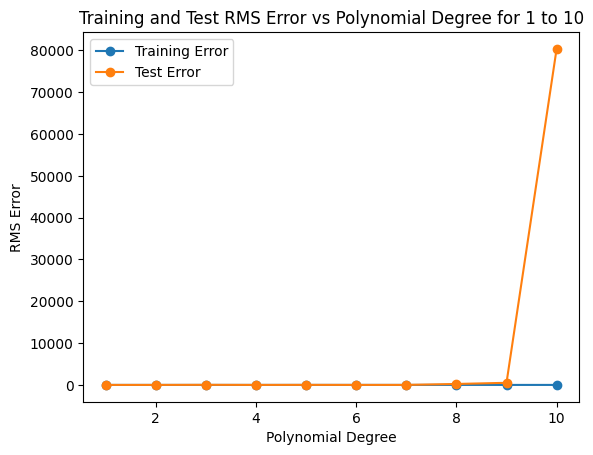

In [216]:
plt.plot(range(1, 10+1), train_errors_1_to_10, label='Training Error', marker='o')
plt.plot(range(1, 10+1), test_errors_1_to_10, label='Test Error', marker='o')
plt.xlabel('Polynomial Degree')
plt.ylabel('RMS Error')
plt.title('Training and Test RMS Error vs Polynomial Degree for 1 to 10')
plt.legend()
plt.show()

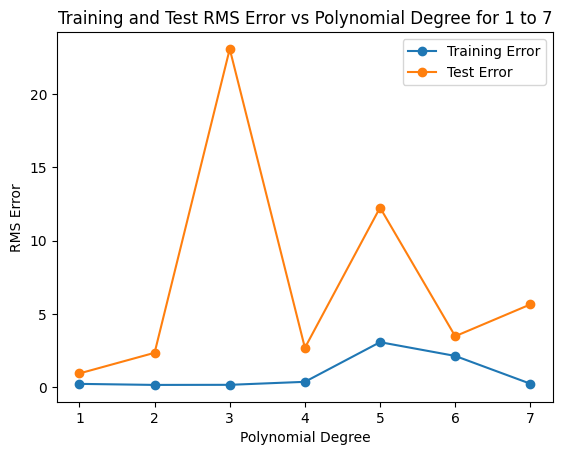

In [229]:
plt.plot(range(1, 7+1), train_errors_1_to_7, label='Training Error', marker='o')
plt.plot(range(1, 7+1), test_errors_1_to_7, label='Test Error', marker='o')
plt.xlabel('Polynomial Degree')
plt.ylabel('RMS Error')
plt.title('Training and Test RMS Error vs Polynomial Degree for 1 to 7')
plt.legend()
plt.show()

## Single Feature Regression

In [269]:
train_errors_single, test_errors_single = [], []

In [305]:
x_single = x_scaled[:][3]
x_train_single, x_test_single = x_scaled[:100][3], x_scaled[100:][3]
y_train_single, y_test_single = y_scaled[:100]   , y_scaled[100:]

In [300]:
print(x_train_single.shape, x_test_single.shape)
print(y_train_single.shape, y_test_single.shape)

(100,) (298,)
(100, 1) (298, 1)


In [301]:
def single_polynomial_basis(X, degree):
    X_poly = np.ones((X.shape[0], degree + 1))
    
    for d in range(1, degree + 1):
        X_poly[:, d] = X[:] ** d
        
    return X_poly

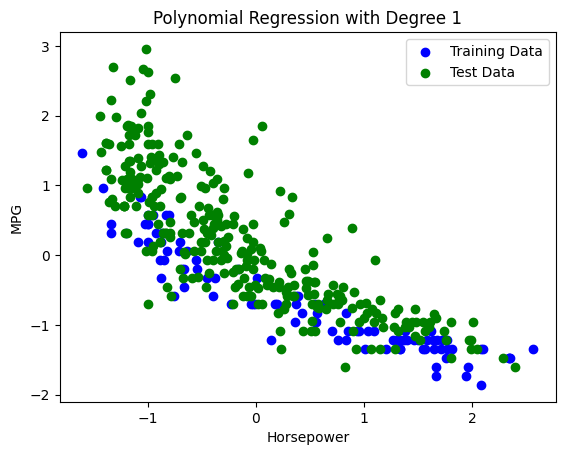

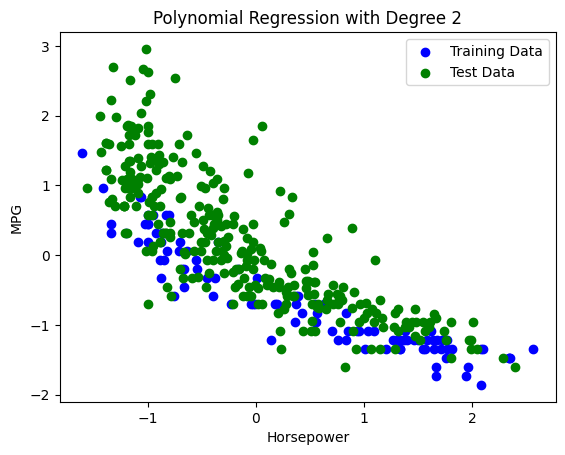

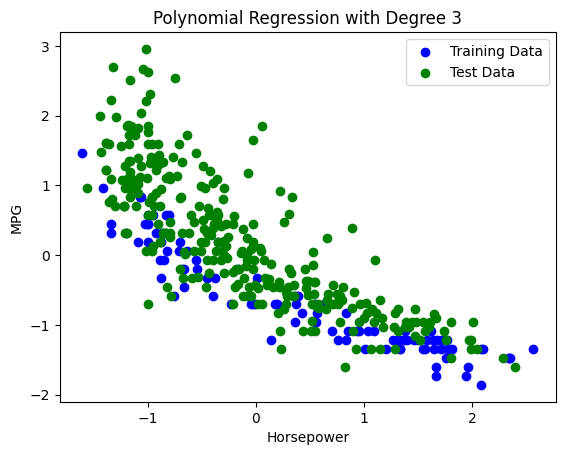

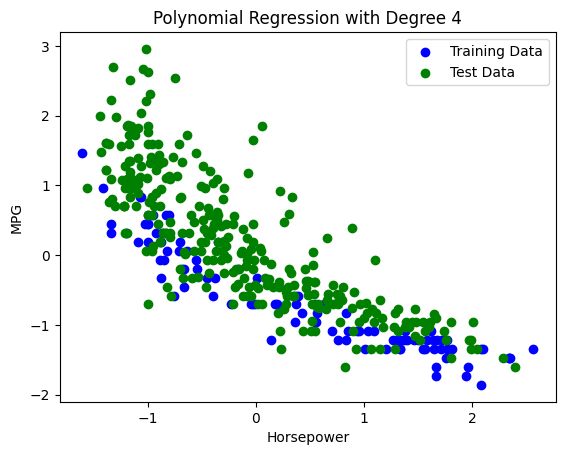

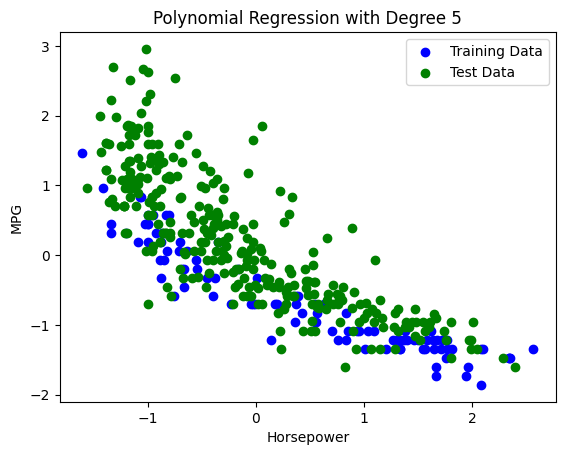

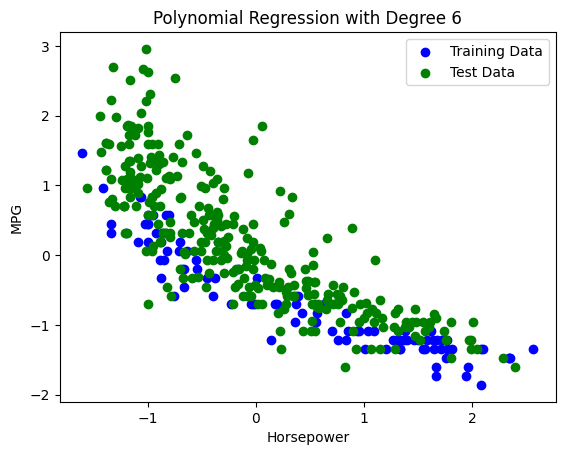

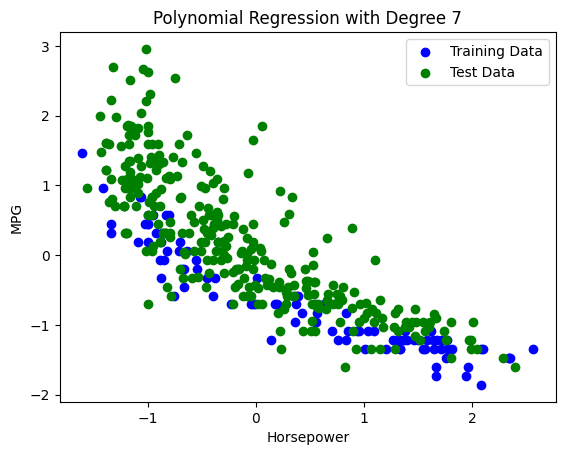

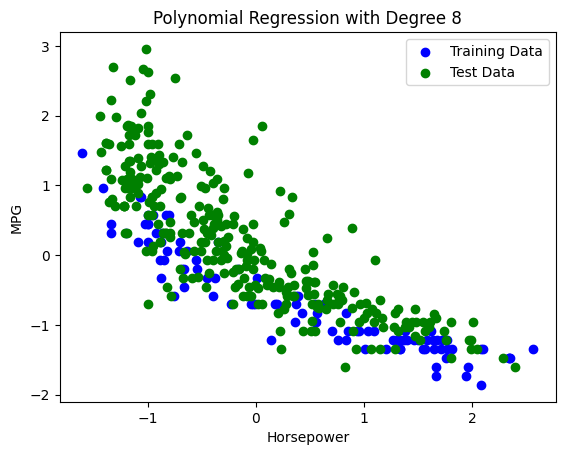

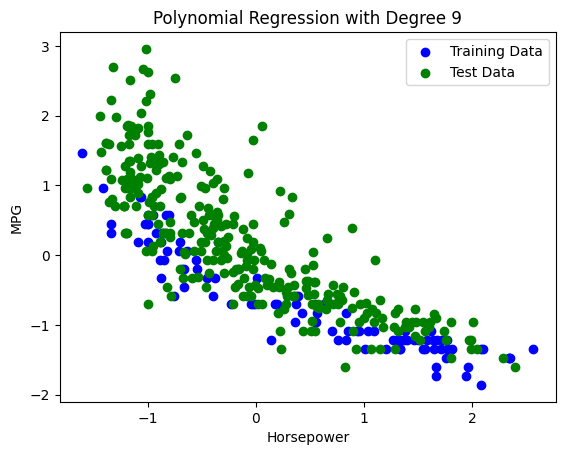

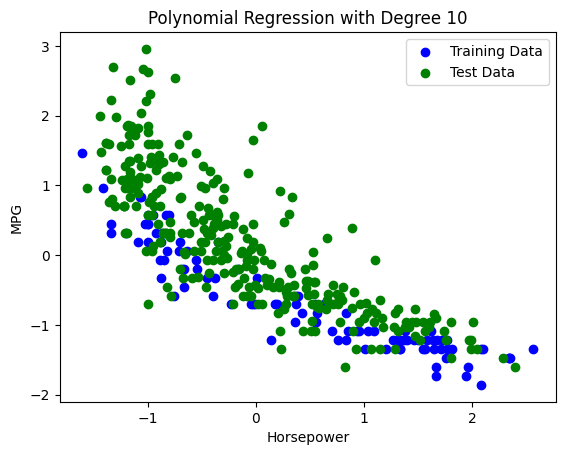

In [360]:
for degree in range(1, 11):
    X_train_poly = single_polynomial_basis(x_train_single, degree)
    X_test_poly  = single_polynomial_basis(x_test_single , degree)

    XtX = np.dot(X_train_poly.T, X_train_poly)
    Xty = np.dot(X_train_poly.T, y_train_single)
    theta = np.dot(np.linalg.pinv(XtX), Xty)

    y_train_pred = X_train_poly @ theta
    y_test_pred = X_test_poly @ theta
    
    plt.scatter(x_train_single, y_train_single, color='blue', label='Training Data')
    plt.scatter(x_test_single, y_test_single, color='green', label='Test Data')
    
    plt.xlabel('Horsepower')
    plt.ylabel('MPG')
    plt.title(f'Polynomial Regression with Degree {degree}')
    plt.legend()
    plt.show()

## With regularization

In [348]:
lambdas = [0, 0.01, 0.1, 1, 10, 100, 1000]
degree = 8

train_errors = []
test_errors = []

In [349]:
def create_polynomial_basis(X, degree):
    X_poly = np.ones((X.shape[0], degree + 1))
    for d in range(1, degree + 1):
        X_poly[:, d] = X[:][0] ** d
        
    return X_poly

In [359]:
X_train_poly = create_polynomial_basis(x_train, degree)
X_test_poly  = create_polynomial_basis(x_test, degree)

In [351]:
for lambda_reg in lambdas:
    XtX = np.dot(X_train_poly.T, X_train_poly)
    XtX_reg = XtX + lambda_reg * np.eye(XtX.shape[0]) 
    Xty = np.dot(X_train_poly.T, y_train)
    theta = np.dot(np.linalg.pinv(XtX_reg), Xty) 

    y_train_pred = X_train_poly @ theta
    y_test_pred = X_test_poly @ theta

    train_errors.append(RMS(y_train, y_train_pred))
    test_errors.append(RMS(y_test, y_test_pred))

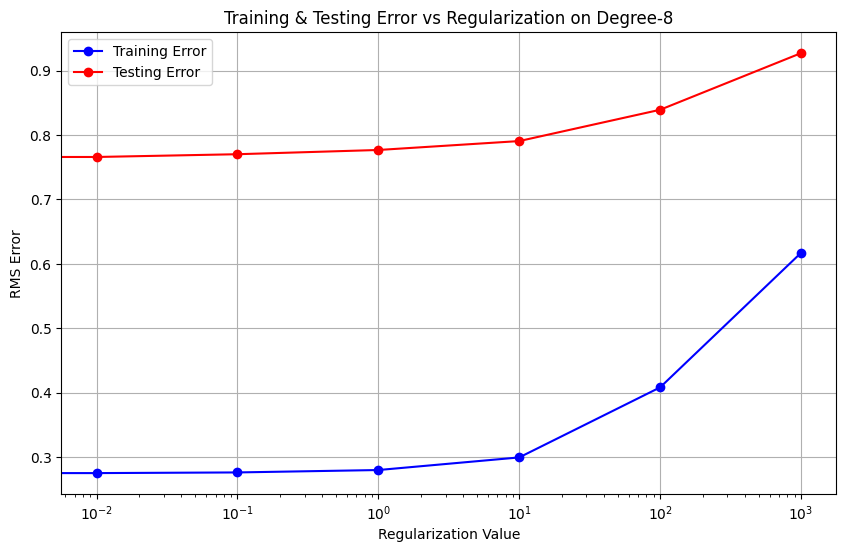

In [356]:
plt.figure(figsize=(10, 6))
plt.semilogx(lambdas, train_errors, label="Training Error", marker='o', color='blue')
plt.semilogx(lambdas, test_errors, label="Testing Error", marker='o', color='red')
plt.xlabel("Regularization Value")
plt.ylabel("RMS Error")
plt.title("Training & Testing Error vs Regularization on Degree-8")
plt.legend()
plt.grid(True)
plt.show()

## Correlation Matrix

In [310]:
import seaborn as sns

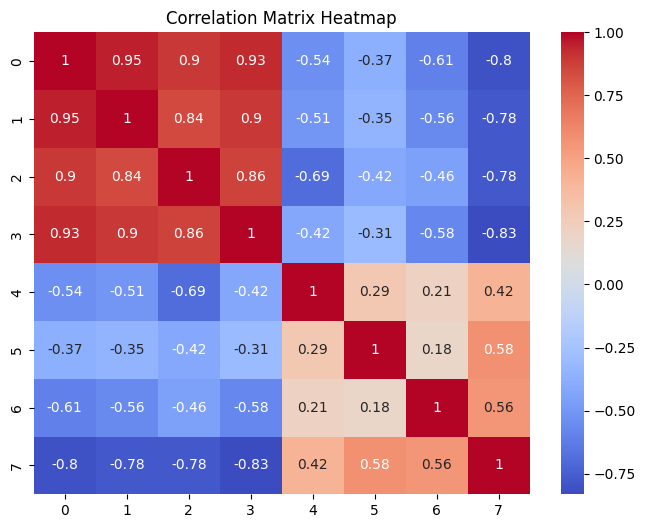

In [400]:
all = pd.DataFrame(np.column_stack((x, y)))
correlation_matrix = all.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix Heatmap")
plt.show()